In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("gold_dataset.csv")
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [5]:
df = df.rename(columns={"Price Sentiment":"Price_Sentiment",
                        })

In [6]:
df.shape

(11412, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11412 entries, 0 to 11411
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     11412 non-null  object
 1   URL                       11412 non-null  object
 2   News                      11412 non-null  object
 3   Price Direction Up        11412 non-null  int64 
 4   Price Direction Constant  11412 non-null  int64 
 5   Price Direction Down      11412 non-null  int64 
 6   Asset Comparision         11412 non-null  int64 
 7   Past Information          11412 non-null  int64 
 8   Future Information        11412 non-null  int64 
 9   Price_Sentiment           11412 non-null  object
dtypes: int64(6), object(4)
memory usage: 891.7+ KB


(-1.1990027187096226,
 1.2086806088077118,
 -1.1857992553364576,
 1.2293915700999947)

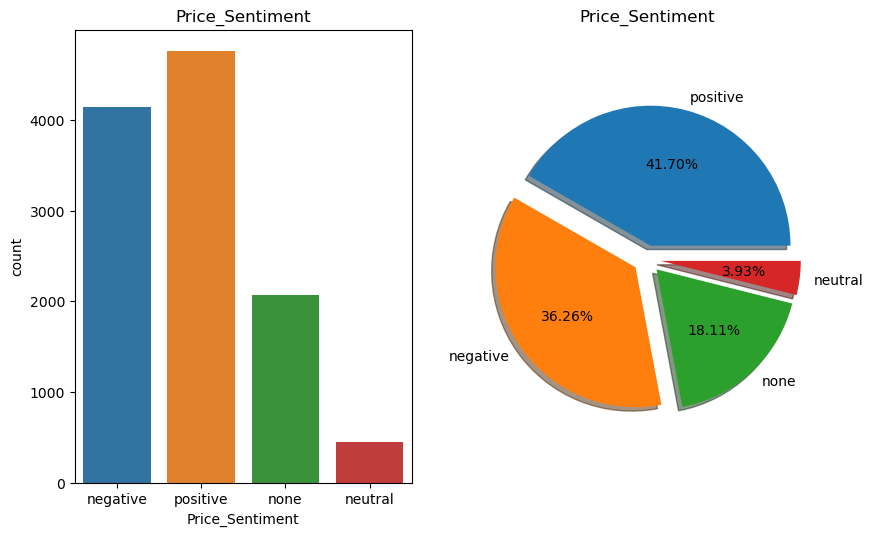

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.Price_Sentiment)
plt.title('Price_Sentiment') 
plt.subplot(3,4,2)
Price_Sentiment = df.Price_Sentiment.value_counts()
plt.pie(Price_Sentiment,explode=[0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Price_Sentiment.index)
plt.title('Price_Sentiment')
plt.axis('equal')

In [10]:
df = df[df["Price_Sentiment"] != 'none']

In [12]:
df['Price_Sentiment'].value_counts()

positive    4759
negative    4138
neutral      448
Name: Price_Sentiment, dtype: int64

In [13]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['Price_Sentiment'].map({'neutral' : 0, 'negative': 1, 'positive': 2})

#check the results with top 5 rows
df.head(5)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment,label_num
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,1
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,1
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,2
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,1
5,16-08-2016,http://www.marketwatch.com/story/dec-gold-clim...,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",1,0,0,0,1,0,positive,2


In [14]:
X = df['News']
y = df['label_num'] 

In [15]:
type(X)

pandas.core.series.Series

In [16]:
type(X.values)

numpy.ndarray

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)

In [25]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [26]:
X_test_cv = v.transform(X_test.values)
y_pred = model.predict(X_test_cv)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.45      0.58        98
           1       0.90      0.93      0.92       807
           2       0.93      0.94      0.93       964

    accuracy                           0.91      1869
   macro avg       0.88      0.77      0.81      1869
weighted avg       0.91      0.91      0.91      1869



# Using sklearn pipelines:

In [28]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [30]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.45      0.58        98
           1       0.90      0.93      0.92       807
           2       0.93      0.94      0.93       964

    accuracy                           0.91      1869
   macro avg       0.88      0.77      0.81      1869
weighted avg       0.91      0.91      0.91      1869



# SMOTE to address the imbalanced target column

In [47]:
X = df['News']
y = df['label_num'] 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<7476x3561 sparse matrix of type '<class 'numpy.int64'>'
	with 67589 stored elements in Compressed Sparse Row format>

In [50]:
y_train.value_counts() # class 0 i.e. Neutral news has only 350 counts in training set, lets use smote to balance the target class

2    3795
1    3331
0     350
Name: label_num, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_cv, y_train = smote.fit_resample(X_train_cv, y_train)

In [52]:
y_train.value_counts() # all the three class are balanced now.

1    3795
2    3795
0    3795
Name: label_num, dtype: int64

In [53]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [54]:
X_test_cv = v.transform(X_test.values)
y_pred = model.predict(X_test_cv)

In [55]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        98
           1       0.91      0.92      0.91       807
           2       0.94      0.91      0.92       964

    accuracy                           0.90      1869
   macro avg       0.79      0.83      0.80      1869
weighted avg       0.90      0.90      0.90      1869



In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_cv, y_train)
X_test_cv = v.transform(X_test.values)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.68        98
           1       0.91      0.95      0.93       807
           2       0.96      0.90      0.93       964

    accuracy                           0.91      1869
   macro avg       0.82      0.88      0.85      1869
weighted avg       0.92      0.91      0.92      1869



In [58]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.7 MB/s eta 0:00:00


In [69]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_cv, y_train)
X_test_cv = v.transform(X_test.values)
y_pred = model_xgb.predict(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        98
           1       0.94      0.93      0.94       807
           2       0.93      0.95      0.94       964

    accuracy                           0.93      1869
   macro avg       0.91      0.87      0.89      1869
weighted avg       0.93      0.93      0.93      1869



**Observation - XGBoost gives best results**

In [70]:
### Create a Pickle file using serialization, XGB model is used.
import pickle
pickle_out = open("model_xgb.pkl","wb")
pickle.dump(model_xgb, pickle_out)
pickle_out.close()